## CM2604 Machine Learning
##### Name: Chirath Shamika Setunge
##### RGU ID: 2330910
##### IIT ID: 20230374
##### Decemeber 2024

## Bank Marketing Campaign

## EDA - Exploratory Data Analysis

##### The dataset was taken from the UCI Machine Learning Repository.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load the data
df = pd.read_csv('bank-full.csv', delimiter=';') # use the delimiter to separate the columns as the data is separated by ';'
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
# identify the number of rows and columns in the dataset  
print("The number of rows in the dataset is", df.shape[0])
print("The number of columns (features) in the dataset is", df.shape[1])

The number of rows in the dataset is 45211
The number of columns (features) in the dataset is 17


In [8]:
# identify the data types of the columns(features)
print("The data types of the columns (features) in the dataset are:")
print(df.dtypes)

The data types of the columns in the dataset are:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [9]:
# identify the number of missing values in the dataset
print("The number of missing values in the dataset is:")
print(df.isnull().sum())

The number of missing values in the dataset is:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [10]:
# identify the number of duplicate rows in the dataset
print("The number of duplicate rows in the dataset is:", df.duplicated().sum())

The number of duplicate rows in the dataset is: 0


In [11]:
# indentify the categorical features in the dataset
print("The categorical features in the dataset are (except the target column (y)):")
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features = [feature for feature in categorical_features if feature != 'y']
print(categorical_features)

The categorical features in the dataset are (except the target column (y)):
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [12]:
# identify the unique values in the categorical features
print("The unique values in the categorical features are:")
for feature in categorical_features:
    print(feature)
    print(df[feature].unique())
    print(f"The number of unique values in the feature {feature} is {len(df[feature].unique())}")
    print('-----------------------------------')

The unique values in the categorical features are:
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
The number of unique values in the feature job is 12
-----------------------------------
marital
['married' 'single' 'divorced']
The number of unique values in the feature marital is 3
-----------------------------------
education
['tertiary' 'secondary' 'unknown' 'primary']
The number of unique values in the feature education is 4
-----------------------------------
default
['no' 'yes']
The number of unique values in the feature default is 2
-----------------------------------
housing
['yes' 'no']
The number of unique values in the feature housing is 2
-----------------------------------
loan
['no' 'yes']
The number of unique values in the feature loan is 2
-----------------------------------
contact
['unknown' 'cellular' 'telephone']
The number of unique values in the feature contac

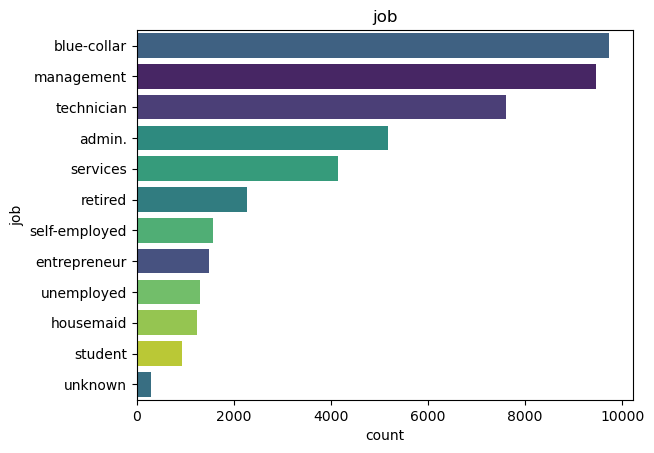

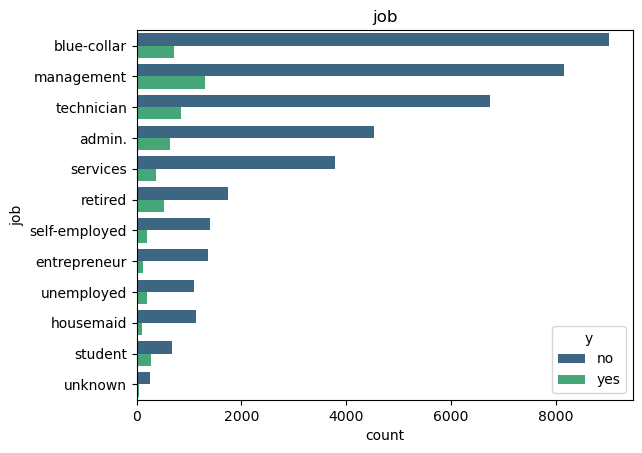

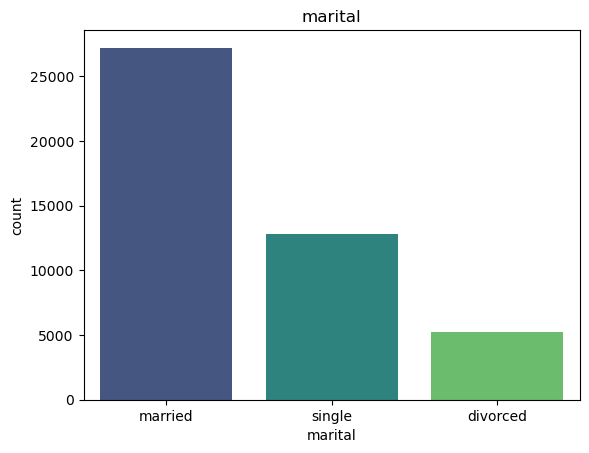

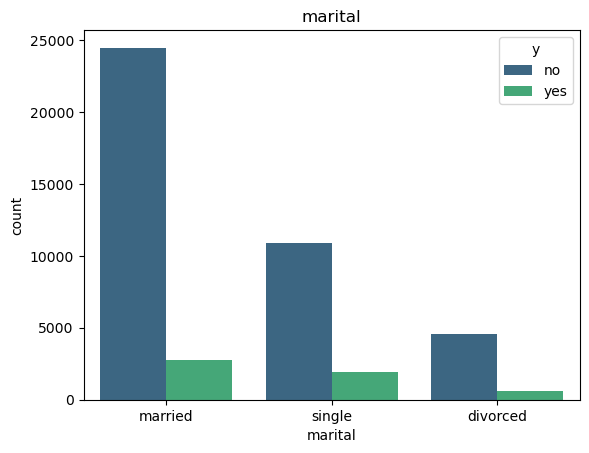

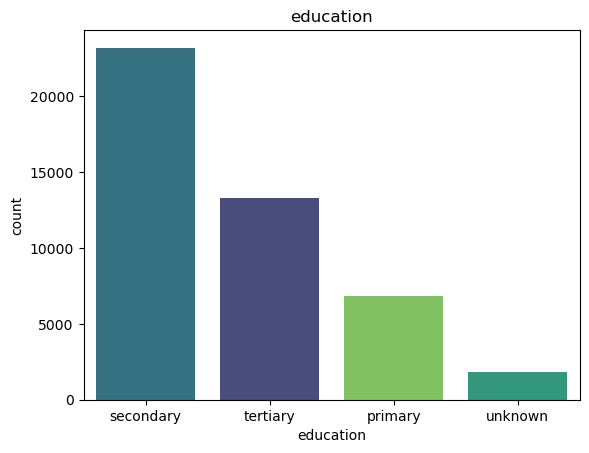

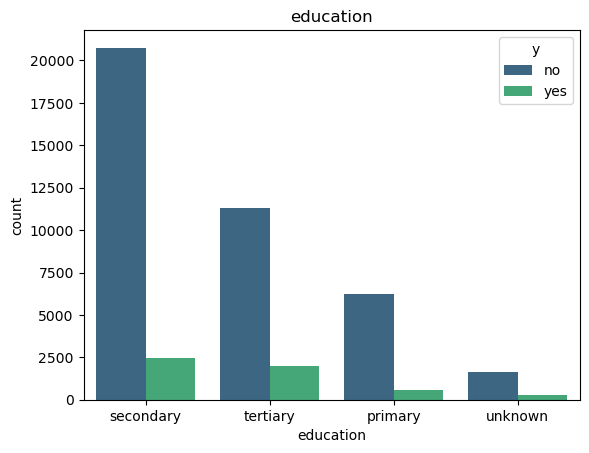

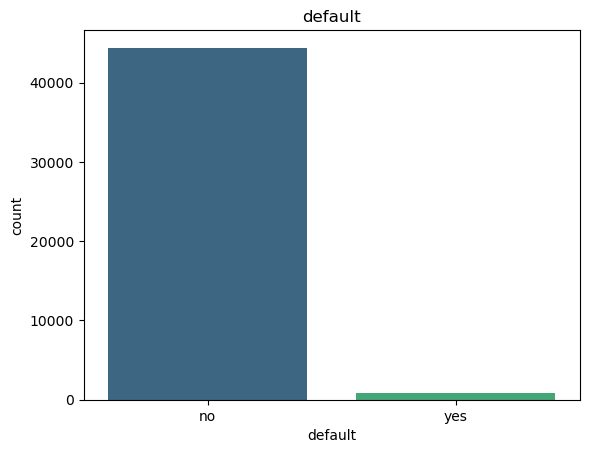

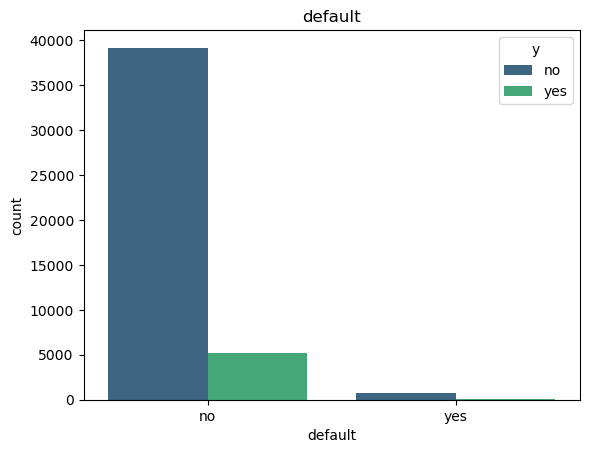

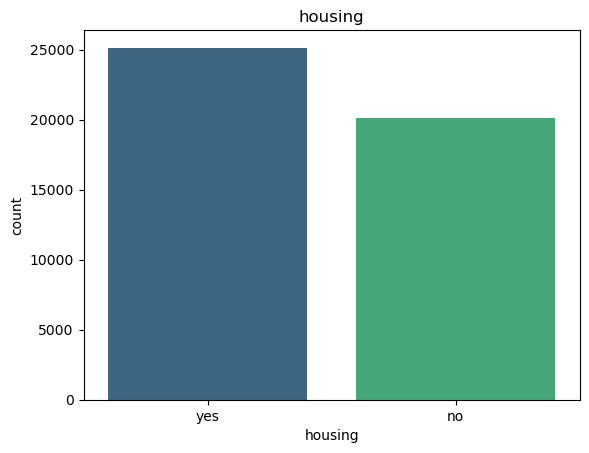

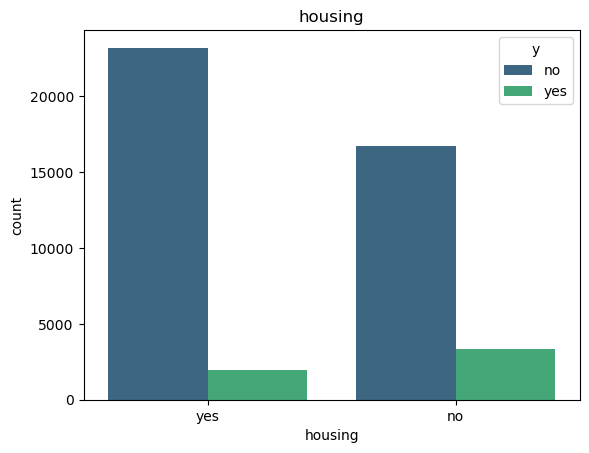

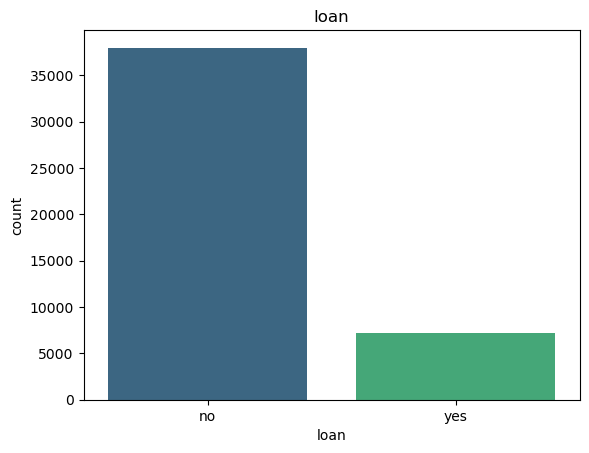

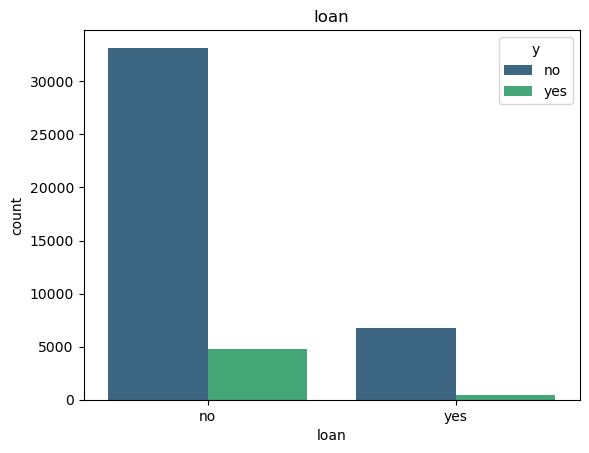

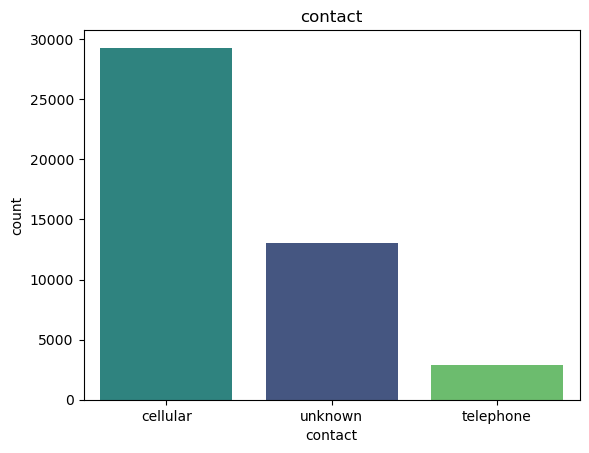

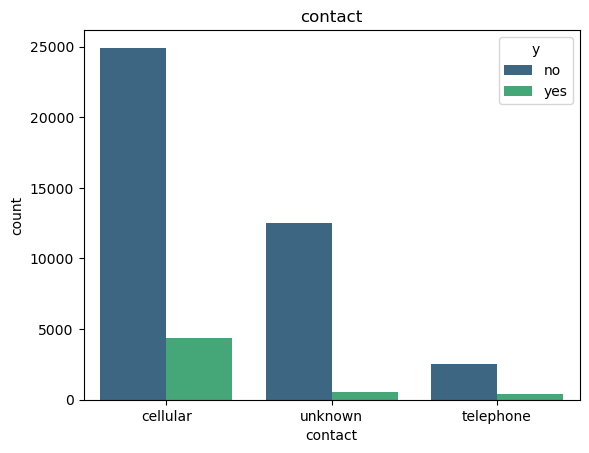

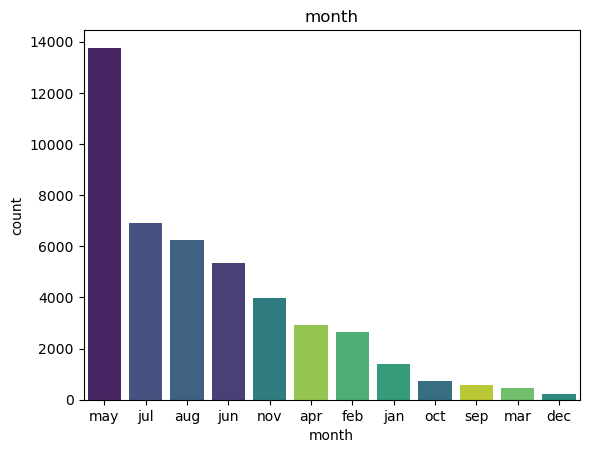

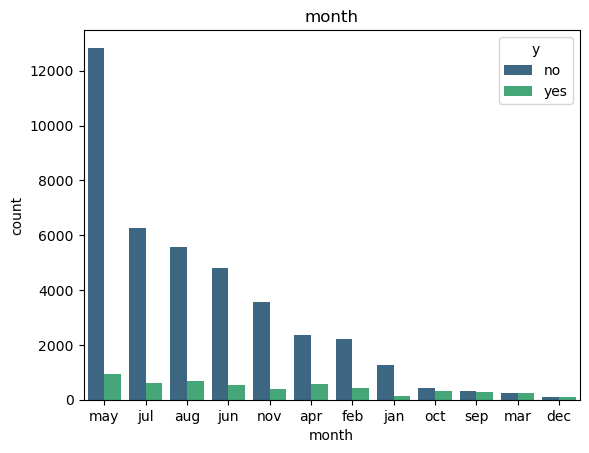

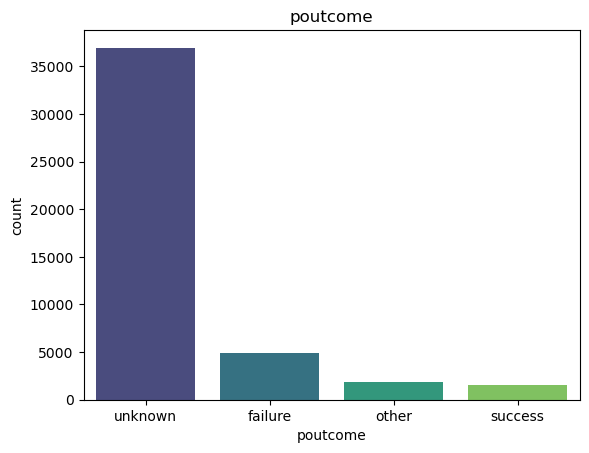

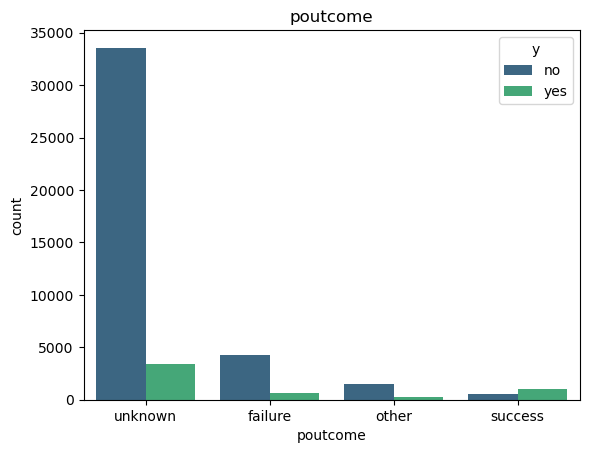

In [13]:
# identify the distribution of the categorical features
for feature in categorical_features:
    # order the categories based on their count
    order = df[feature].value_counts().index
    if feature == 'job':
        sns.countplot(y=feature, data=df, hue=feature, palette='viridis', order=order)
        plt.title(feature)
        plt.show()
        # indentify the distribution of the categorical features with respect to the target column
        sns.countplot(y=feature, data=df, hue='y', palette='viridis', order=order)
        plt.title(feature)
        plt.show() 
    else:
        sns.countplot(x=feature, data=df, hue=feature, palette='viridis', order=order)
        plt.title(feature)
        plt.show()
        # check the distribution of the categorical features with respect to the target column 
        sns.countplot(x=feature, data=df, hue='y', palette='viridis', order=order)
        plt.title(feature)
        plt.show()

In [14]:
# identify the numerical features in the dataset
print("The numerical features in the dataset are:")
numerical_features = df.select_dtypes(include=['int64']).columns
print(numerical_features)

The numerical features in the dataset are:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [15]:
# identify the descriptive statistics of the numerical columns (at once)
print("The descriptive statistics of the numerical features are:")
print(df[numerical_features].describe())

The descriptive statistics of the numerical features are:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%  

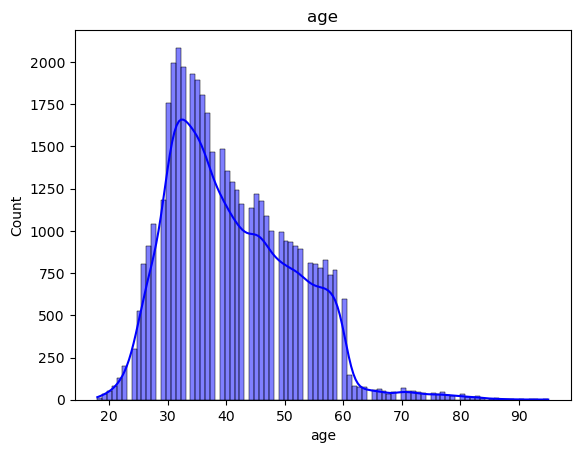

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


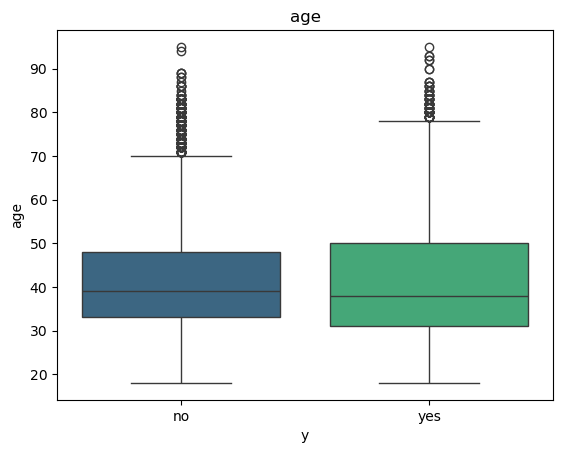

-----------------------------------


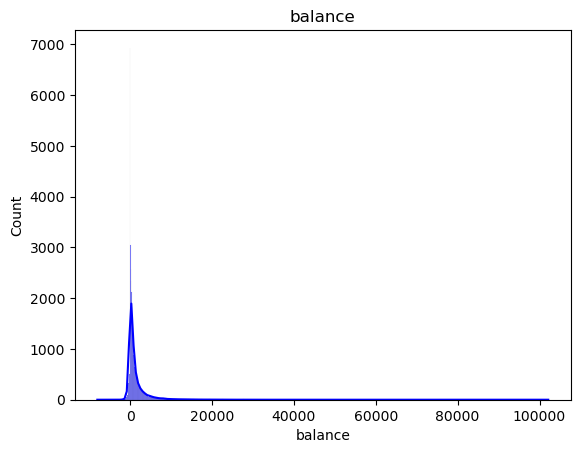

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


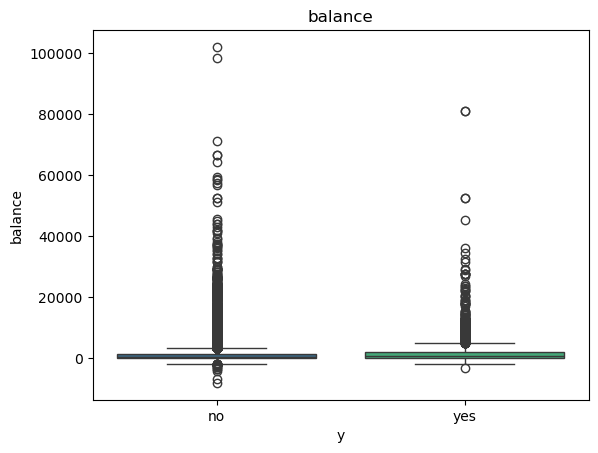

-----------------------------------


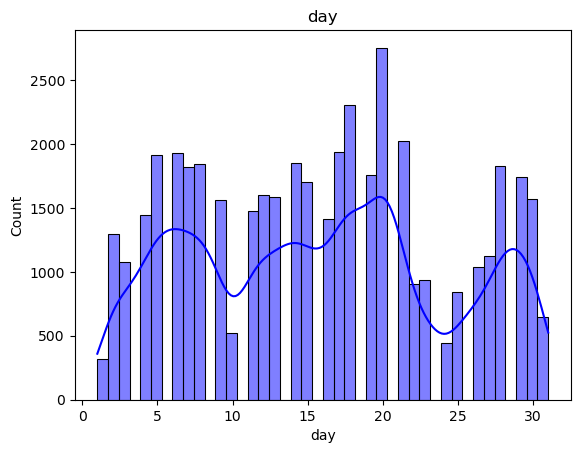

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64


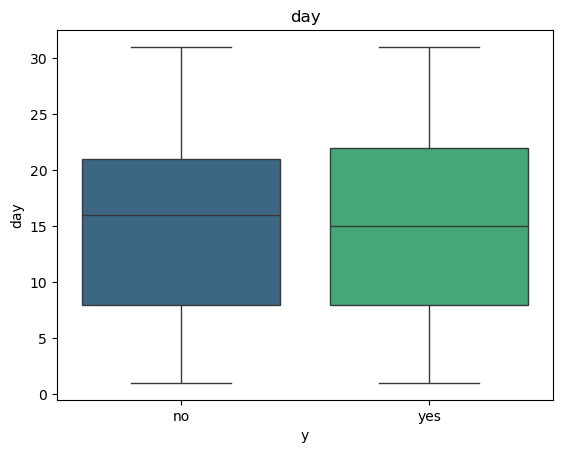

-----------------------------------


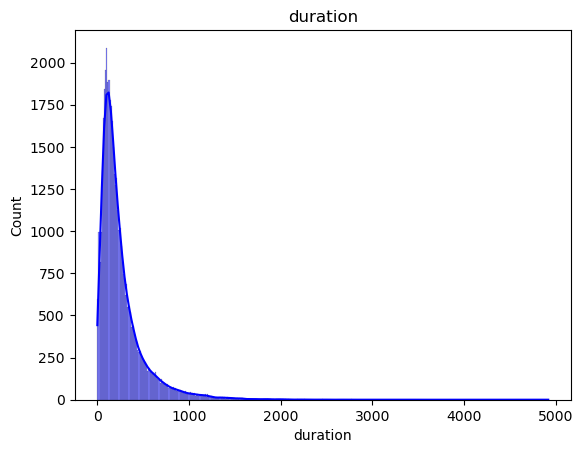

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


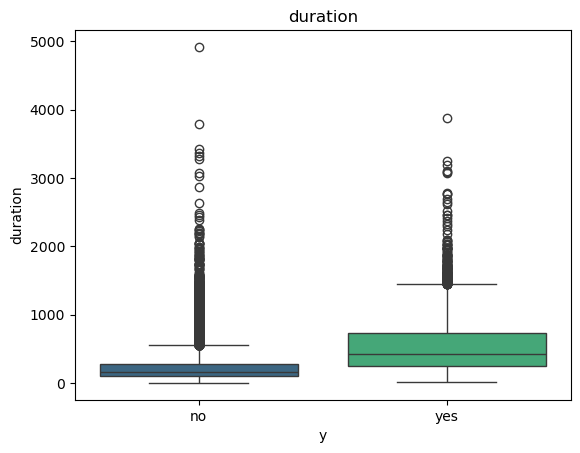

-----------------------------------


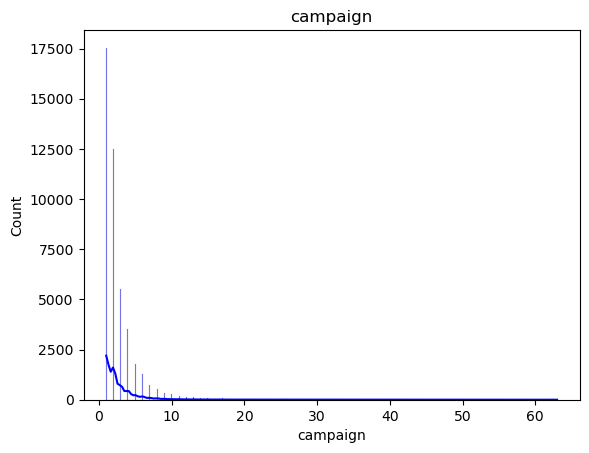

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


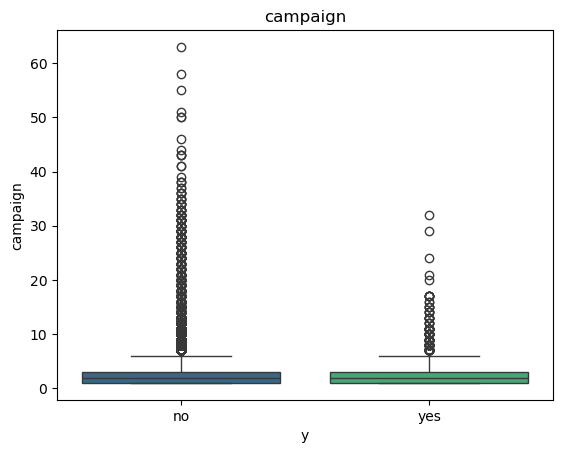

-----------------------------------


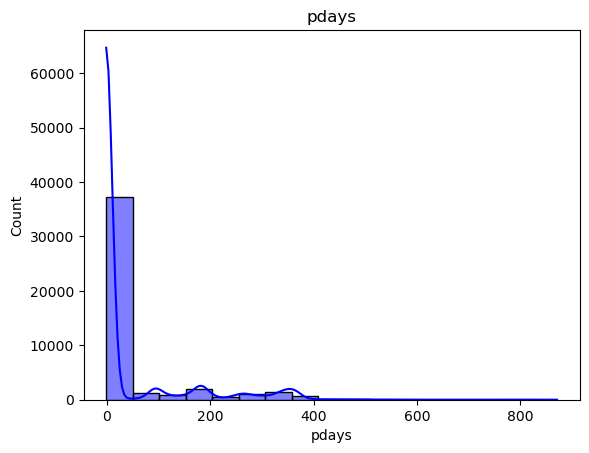

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


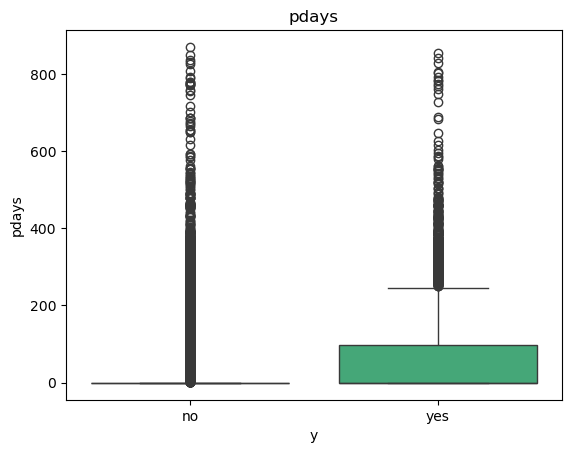

-----------------------------------


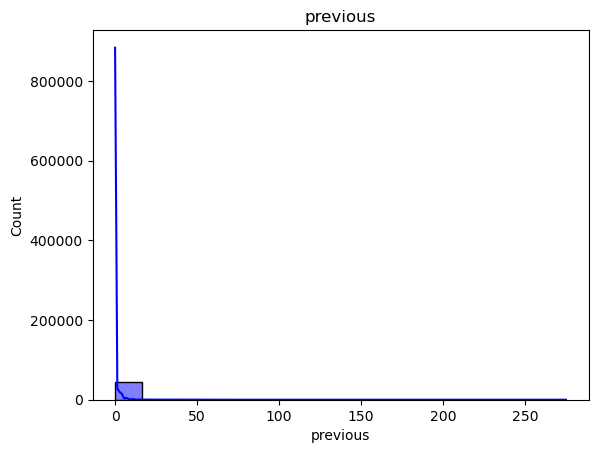

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64


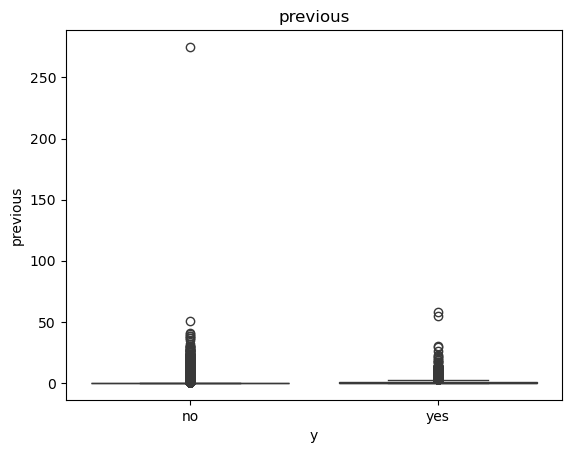

-----------------------------------


In [16]:
# indentify the distribution of the numerical features
for feature in numerical_features:
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(feature)
    plt.show()
    # display the discriptive statistics for each numerical feature
    print(df[feature].describe())
    # identify the distribution of the numerical features with respect to the target column
    sns.boxplot(x='y', y=feature, data=df, hue='y', palette='viridis')
    plt.title(feature)
    plt.show()
    print('-----------------------------------')